In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
from collections import Counter

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/lkz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/lkz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/lkz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
data = pd.read_csv('../data-processer/cleaned_data.csv')
data

,group,month,day,timestamp,text
0,Expats in Tallinn/Estonia,12,31,1672518833000,"Hi, Is it true that freezing car registration ..."
1,Expats in Tallinn/Estonia,12,31,1672511471000,"A table for sale, pm if interested! https://ww..."
2,Expats in Tallinn/Estonia,12,31,1672503037000,If you're looking to welcome the new year with...
3,Expats in Tallinn/Estonia,12,31,1672498089000,"On behalf of admin team, Happy new year expats..."
4,Expats in Tallinn/Estonia,12,31,1672492747000,"Tere guys , Will there be any countdown thing ..."
...,...,...,...,...,...
8105,Expats in Tallinn/Estonia,1,1,1641036083000,I've read that in Estonia when walking at nigh...
8106,Expats in Tallinn/Estonia,1,1,1641035056000,Hey people! Yesterday night in a club at Old T...
8107,Expats in Tallinn/Estonia,1,1,1641031238000,Happy New Year Everyone. Please can anyone kin...
8108,Expats in Tallinn/Estonia,1,1,1641028022000,"Hello, I am looking for someone who can create..."


# Text preparation

## Remove URL, punctuation, and number

In [4]:
clean_text = data['text'].apply(lambda x: re.sub("[^a-zA-Z]", " ", re.sub(r'http\S+', '', x)))
clean_text

0       Hi  Is it true that freezing car registration ...
1                    A table for sale  pm if interested  
2       If you re looking to welcome the new year with...
3       On behalf of admin team  Happy new year expats...
4       Tere guys   Will there be any countdown thing ...
                              ...                        
8105    I ve read that in Estonia when walking at nigh...
8106    Hey people  Yesterday night in a club at Old T...
8107    Happy New Year Everyone  Please can anyone kin...
8108    Hello  I am looking for someone who can create...
8109    Hey familia   If a family  specially with kids...
Name: text, Length: 8110, dtype: object

## Tokenize

In [5]:
clean_text = clean_text.apply(lambda x: [word.lower() for word in nltk.word_tokenize(x)])
clean_text

0       [hi, is, it, true, that, freezing, car, regist...
1               [a, table, for, sale, pm, if, interested]
2       [if, you, re, looking, to, welcome, the, new, ...
3       [on, behalf, of, admin, team, happy, new, year...
4       [tere, guys, will, there, be, any, countdown, ...
                              ...                        
8105    [i, ve, read, that, in, estonia, when, walking...
8106    [hey, people, yesterday, night, in, a, club, a...
8107    [happy, new, year, everyone, please, can, anyo...
8108    [hello, i, am, looking, for, someone, who, can...
8109    [hey, familia, if, a, family, specially, with,...
Name: text, Length: 8110, dtype: object

## Lemmatisation and Stemming


In [6]:
stemmer = nltk.stem.PorterStemmer()
lemmatizer = nltk.stem.WordNetLemmatizer()

In [7]:
clean_text = clean_text.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
clean_text

0       [hi, is, it, true, that, freezing, car, regist...
1               [a, table, for, sale, pm, if, interested]
2       [if, you, re, looking, to, welcome, the, new, ...
3       [on, behalf, of, admin, team, happy, new, year...
4       [tere, guy, will, there, be, any, countdown, t...
                              ...                        
8105    [i, ve, read, that, in, estonia, when, walking...
8106    [hey, people, yesterday, night, in, a, club, a...
8107    [happy, new, year, everyone, please, can, anyo...
8108    [hello, i, am, looking, for, someone, who, can...
8109    [hey, familia, if, a, family, specially, with,...
Name: text, Length: 8110, dtype: object

## Clean stop word

In [8]:
stop_words = []

# https://github.com/stopwords-iso/stopwords-en
# https://www.kaggle.com/datasets/rowhitswami/stopwords
with open('stopwords-en.txt', "r") as f:
    for line in f:
        stop_words.extend(line.split()) 
        
len(stop_words)

1298

In [9]:
clean_text = clean_text.apply(lambda x: [word for word in x if word not in (stop_words)])
clean_text

0       [true, freezing, car, registration, month, ext...
1                                           [table, sale]
2       [expat, town, bar, called, shimo, freedom, squ...
3       [behalf, admin, team, happy, expat, plenty, su...
4       [tere, guy, countdown, tallinn, city, tonight,...
                              ...                        
8105    [read, estonia, walking, night, supposed, wear...
8106    [hey, people, yesterday, night, club, town, ha...
8107    [happy, kindly, recommend, affordable, cargo, ...
8108    [create, business, kindly, meet, person, talli...
8109    [hey, familia, family, specially, kid, stuck, ...
Name: text, Length: 8110, dtype: object

# Ngram

In [25]:
def plot_ngrams(n):
     return clean_text \
        .apply(lambda x: [' '.join(item) for item in list(nltk.ngrams(x, n))]) \
        .explode() \
        .to_frame() \
        .reset_index(drop=True) \
        .groupby('text').text.count() \
        .reset_index(name='count') \
        .sort_values(['count'], ascending=False) \
        .head(30).reset_index(drop=True) \
        .sort_values(['count'], ascending=True) \
        .plot.barh(x='text')
    

<Axes: ylabel='text'>

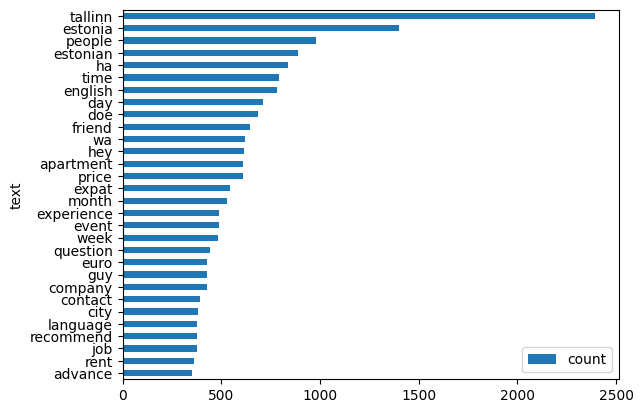

In [26]:
plot_ngrams(1)

<Axes: ylabel='text'>

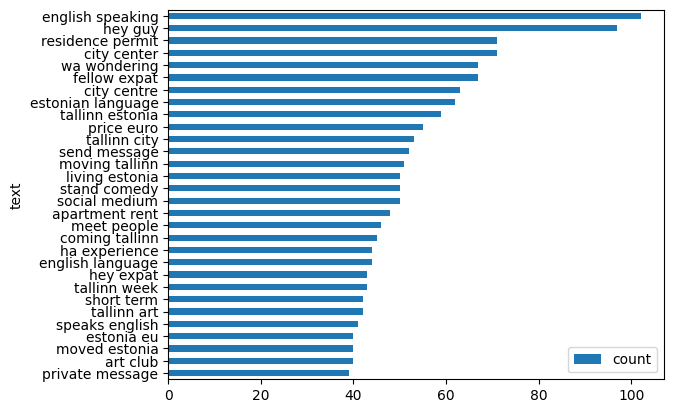

In [27]:
plot_ngrams(2)

<Axes: ylabel='text'>

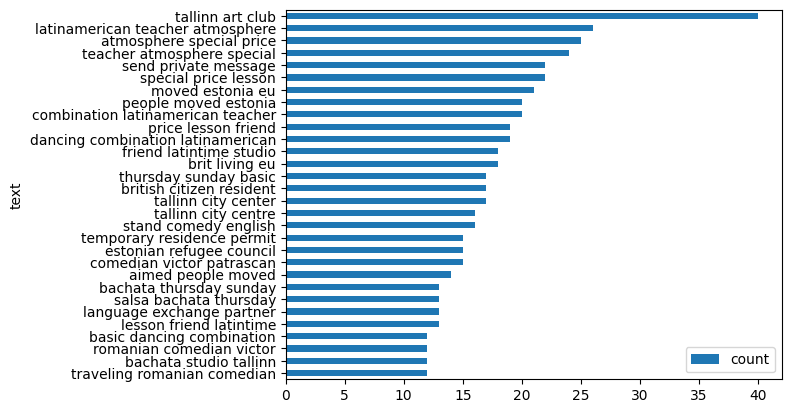

In [28]:
plot_ngrams(3)

In [29]:
clean_text.to_csv('tokenized_data.csv')